In [2]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Bitcoin_Historical_Data1.csv')
print(df.head())

                        date   adj_close       close        high         low  \
0  2014-09-17 00:00:00+00:00  457.334015  457.334015  468.174011  452.421997   
1  2014-09-18 00:00:00+00:00  424.440002  424.440002  456.859985  413.104004   
2  2014-09-19 00:00:00+00:00  394.795990  394.795990  427.834992  384.532013   
3  2014-09-20 00:00:00+00:00  408.903992  408.903992  423.295990  389.882996   
4  2014-09-21 00:00:00+00:00  398.821014  398.821014  412.425995  393.181000   

         open      volume  daily_returns profit/loss  percentreturn  ...  \
0  465.864014  21056800.0      -1.831006        LOSS      -0.400365  ...   
1  456.859985  34483200.0      -7.096262        LOSS      -1.671912  ...   
2  424.102997  37919700.0      -6.910351        LOSS      -1.750360  ...   
3  394.673004  36863600.0       3.605767      PROFIT       0.881813  ...   
4  408.084992  26580100.0      -2.270110        LOSS      -0.569205  ...   

   rolling_return_30  rolling_max_7  rolling_min_7  close_lag_

In [4]:
# DROP ALL COLUMNS THAT ARE NOT INTEGERS OR FLOATS
df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

In [5]:
# Get columns with NaN values and their count
nan_columns = df.columns[df.isna().any()].tolist()
nan_counts = df[nan_columns].isna().sum()

print("columns with Nan entries:\n", nan_columns)

print("total number of Nan values:\n", nan_counts)


columns with Nan entries:
 ['MA50', 'MA200', 'RSI', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d', 'ATR', 'rolling_mean_7', 'rolling_mean_30', 'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7', 'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1', 'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength']
total number of Nan values:
 MA50                  49
MA200                199
RSI                   13
BB_middle             19
BB_std                19
BB_upper              19
BB_lower              19
BB_width              19
stoch_k               13
stoch_d               15
ATR                   13
rolling_mean_7         6
rolling_mean_30       29
rolling_vol_7          6
rolling_vol_30        29
rolling_return_7       7
rolling_return_30     30
rolling_max_7          6
rolling_min_7          6
close_lag_1            1
close_lag_3            3
close_lag_7            7
close_lag_30          30
trend_strength       199
dtype

In [6]:
# Impute missing values using forward fill then backward fill
clean_df = df.fillna(method='ffill').fillna(method='bfill')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10356\3138551487.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_df = df.fillna(method='ffill').fillna(method='bfill')


In [7]:
# Get columns with NaN values and their count
nan_columns = clean_df.columns[df.isna().any()].tolist()
nan_counts = clean_df[nan_columns].isna().sum()

print("columns with Nan entries:\n", nan_columns)
print("total number of Nan values:\n", nan_counts)

columns with Nan entries:
 ['MA50', 'MA200', 'RSI', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d', 'ATR', 'rolling_mean_7', 'rolling_mean_30', 'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7', 'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1', 'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength']
total number of Nan values:
 MA50                 0
MA200                0
RSI                  0
BB_middle            0
BB_std               0
BB_upper             0
BB_lower             0
BB_width             0
stoch_k              0
stoch_d              0
ATR                  0
rolling_mean_7       0
rolling_mean_30      0
rolling_vol_7        0
rolling_vol_30       0
rolling_return_7     0
rolling_return_30    0
rolling_max_7        0
rolling_min_7        0
close_lag_1          0
close_lag_3          0
close_lag_7          0
close_lag_30         0
trend_strength       0
dtype: int64


In [8]:
clean_df.columns

Index(['adj_close', 'close', 'high', 'low', 'open', 'volume', 'daily_returns',
       'percentreturn', 'MA50', 'MA200', 'price_range', 'price_change',
       'volatility', 'RSI', 'EMA12', 'EMA26', 'MACD', 'Signal_Line',
       'day_of_week', 'week_of_year', 'month', 'is_weekend', 'BB_middle',
       'BB_std', 'BB_upper', 'BB_lower', 'BB_width', 'stoch_k', 'stoch_d',
       'ATR', 'OBV', 'vwap', 'rolling_mean_7', 'rolling_mean_30',
       'rolling_vol_7', 'rolling_vol_30', 'rolling_return_7',
       'rolling_return_30', 'rolling_max_7', 'rolling_min_7', 'close_lag_1',
       'close_lag_3', 'close_lag_7', 'close_lag_30', 'trend_strength',
       'volatility_volume_ratio', 'MACD_histogram'],
      dtype='object')

In [9]:
clean_df.head()

,adj_close,close,high,low,open,volume,daily_returns,percentreturn,MA50,MA200,...,rolling_return_30,rolling_max_7,rolling_min_7,close_lag_1,close_lag_3,close_lag_7,close_lag_30,trend_strength,volatility_volume_ratio,MACD_histogram
0,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0,-1.831006,-0.400365,372.76684,310.84317,...,-0.16088,468.174011,384.532013,457.334015,457.334015,457.334015,457.334015,0.835065,1.605775e-09,0.000000
1,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0,-7.096262,-1.671912,372.76684,310.84317,...,-0.16088,468.174011,384.532013,457.334015,457.334015,457.334015,457.334015,0.835065,2.777453e-09,-0.328003
2,394.795990,394.795990,427.834992,384.532013,424.102997,37919700.0,-6.910351,-1.750360,372.76684,310.84317,...,-0.16088,468.174011,384.532013,424.440002,457.334015,457.334015,457.334015,0.835065,2.692660e-09,-0.855515
3,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0,3.605767,0.881813,372.76684,310.84317,...,-0.16088,468.174011,384.532013,394.795990,457.334015,457.334015,457.334015,0.835065,2.296573e-09,-0.536080
4,398.821014,398.821014,412.425995,393.181000,408.084992,26580100.0,-2.270110,-0.569205,372.76684,310.84317,...,-0.16088,468.174011,384.532013,408.903992,424.440002,457.334015,457.334015,0.835065,1.774233e-09,-0.614533


In [26]:
clean_df.describe()

,adj_close,close,high,low,open,volume,daily_returns,percentreturn,MA50,MA200,...,rolling_return_30,rolling_max_7,rolling_min_7,close_lag_1,close_lag_3,close_lag_7,close_lag_30,trend_strength,volatility_volume_ratio,MACD_histogram
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3.724000e+03,3724.000000,3724.000000,3724.000000,3724.000000,...,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3.724000e+03,3724.000000
mean,18848.682607,18848.682607,19251.921860,18381.434184,18825.293605,1.814889e+10,0.201795,0.004997,18306.028955,17028.069552,...,0.067358,19957.159926,17464.371188,18824.104737,18773.030234,18668.897627,18181.910691,1.110848,2.157967e-10,6.801811
std,20873.547415,20873.547415,21309.793415,20365.354458,20843.083528,1.975932e+10,3.620708,0.509438,20068.552006,18502.336652,...,0.239786,21982.991335,19361.809895,20841.268998,20769.467226,20617.317932,20091.492308,0.288303,5.583792e-10,303.477724
min,178.102997,178.102997,211.731003,171.509995,176.897003,5.914570e+06,-37.186895,-11.483293,232.261620,245.701330,...,-0.603168,229.067001,171.509995,178.102997,178.102997,178.102997,178.102997,0.627390,1.859263e-13,-1694.518207
25%,1198.755005,1198.755005,1217.054962,1178.120025,1192.667511,3.519457e+08,-1.262873,-0.011670,1121.405890,869.252090,...,-0.085376,1257.979980,1124.589966,1192.555023,1187.855011,1182.002533,1095.297485,0.869851,1.235553e-12,-56.580909
50%,9284.764160,9284.764160,9440.763184,9134.778809,9284.070801,1.442858e+10,0.119255,0.000730,9217.402622,8744.339226,...,0.032624,9835.382324,8727.089844,9280.158692,9277.233887,9268.161621,9181.797363,1.080453,2.276726e-12,0.618693
75%,30182.014653,30182.014653,30605.878423,29580.905762,30153.408690,2.919828e+10,1.682767,0.019952,29086.064912,28554.177693,...,0.182366,31460.052730,28724.140630,30152.225097,30118.761720,30041.607425,29541.162113,1.264781,7.730899e-11,65.248094
max,98997.664060,98997.664060,99655.500000,97232.890630,99006.742190,3.510000e+11,25.470168,8.875621,76260.972422,66206.333692,...,1.926924,99655.500000,90770.812500,98997.664060,98997.664060,92343.789060,73083.500000,2.086303,6.642039e-09,1882.855550


In [10]:
# Define target variable
y = clean_df['close']
y.head()

0    457.334015
1    424.440002
2    394.795990
3    408.903992
4    398.821014
Name: close, dtype: float64

In [24]:
# Define input features
X = clean_df.drop(columns=['close', 'adj_close'])
X.columns

Index(['high', 'low', 'open', 'volume', 'daily_returns', 'percentreturn',
       'MA50', 'MA200', 'price_range', 'price_change', 'volatility', 'RSI',
       'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'day_of_week', 'week_of_year',
       'month', 'is_weekend', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
       'BB_width', 'stoch_k', 'stoch_d', 'ATR', 'OBV', 'vwap',
       'rolling_mean_7', 'rolling_mean_30', 'rolling_vol_7', 'rolling_vol_30',
       'rolling_return_7', 'rolling_return_30', 'rolling_max_7',
       'rolling_min_7', 'close_lag_1', 'close_lag_3', 'close_lag_7',
       'close_lag_30', 'trend_strength', 'volatility_volume_ratio',
       'MACD_histogram'],
      dtype='object')

In [25]:
# Display features and target variable
print("Shape of X (features):", X.shape)
print("Shape of Y (target):", y.shape)

Shape of X (features): (3724, 45)
Shape of Y (target): (3724,)


In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2979, 44)
X_test shape: (745, 44)


In [15]:
# Import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [17]:
# Fit the MinMaxScaler object with the features data
scaler.fit(X_train)

MinMaxScaler()

In [18]:
# Transform the features data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the scaled data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (2979, 45)
X_test_scaled shape: (745, 45)


In [19]:
# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [20]:
from joblib import dump

# Save the model
dump(rf_model, 'RFmodel.joblib')

['RFmodel.joblib']

In [21]:
import pickle

# Save the model
with open('RFmodel.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [22]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [23]:
# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error :\n", mse)
print("R2 Score:\n", r2)

Mean Square Error :
 171083.16478854086
R2 Score:
 0.9996223726578323


In [86]:
# Create a DataFrame of the feature names and importance
importances = rf_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the DataFrame by feature importance
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)
feature_importances.head()

,feature,importance
0,high,0.584816
1,low,0.311908
2,open,0.049156
3,close_lag_1,0.047872
4,rolling_max_7,0.001004


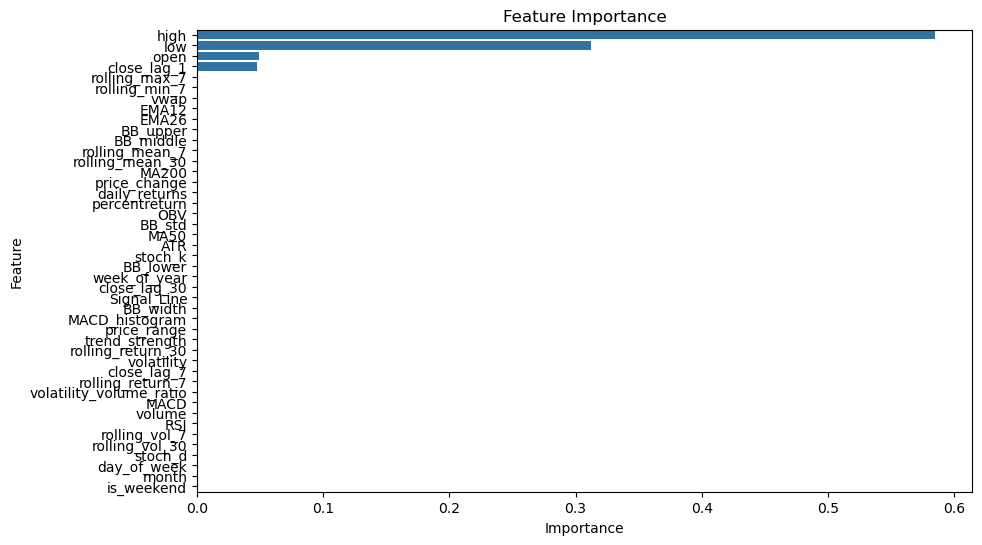

In [88]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances['feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [90]:
# Create a new DataFrame with only the 5 most important features
X_important = X[feature_importances['feature'][:5]]
X_important.head()

,high,low,open,close_lag_1,rolling_max_7
0,468.174011,452.421997,465.864014,457.334015,468.174011
1,456.859985,413.104004,456.859985,457.334015,468.174011
2,427.834992,384.532013,424.102997,424.440002,468.174011
3,423.295990,389.882996,394.673004,394.795990,468.174011
4,412.425995,393.181000,408.084992,408.903992,468.174011


In [ ]:
# Split the data into training and testing sets
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Create a new MinMaxScaler
scaler_imp = MinMaxScaler()

# Fit the scaler with the training data
scaler_imp.fit(X_train_imp)

In [ ]:
# Transform the training and testing data
X_train_scaled_imp = scaler_imp.transform(X_train_imp)
X_test_scaled_imp = scaler_imp.transform(X_test_imp)


In [ ]:
# Create and train the new model
rf_model_imp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_imp.fit(X_train_scaled_imp, y_train_imp)


In [ ]:
# Make predictions
y_pred_imp = rf_model_imp.predict(X_test_scaled_imp)


In [ ]:
# Calculate and print performance metrics
mse_imp = mean_squared_error(y_test_imp, y_pred_imp)
r2_imp = r2_score(y_test_imp, y_pred_imp)

print("Mean Square Error with 5 most important features:\n", mse_imp)
print("R2 Score with 5 most important features:\n", r2_imp)

In [ ]:
# Plot the 5 most important features of the forest
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'][:5], y=feature_importances['feature'][:5])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
